In [17]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import StringIndexer
from pyspark.sql import SparkSession
from pyspark import SparkContext
from pyspark.ml.regression import LinearRegression
import pandas as pd


In [18]:
spark=SparkSession.builder.appName('projet').getOrCreate()

In [4]:
data_train=spark.read.csv("data_train.csv",inferSchema=True ,header=True)
data_text=spark.read.csv("test_data.csv",inferSchema=True ,header=True)


In [5]:
indexer = StringIndexer(inputCol="type", outputCol="type_index").fit(data_train)
indexer2 = StringIndexer(inputCol="type", outputCol="type_index").fit(data_text)

In [6]:
df_train = indexer.transform(data_train)
df_test = indexer2.transform(data_text)

In [16]:
out=df_train.toPandas()
out

,_key,a,area,ci,d,eccentricity,kx,ky,m00,m01,...,mu02,mu03,mu11,mu20,mu30,pi,sx,sy,type,type_index
0,-LA07prX-5Fv0Hrn_oe0,0.735318,48951.0,1.305102,330.246338,0.728682,2.123283e+16,7.487894e+16,48951.0,6388105.5,...,2.736402e+08,0.0,0.000000e+00,1.457149e+08,0.000000,896.0,0.000000e+00,0.0,Feuille d'avokado,4.0
1,-LA08FYaTlZ2noy8lXQd,0.597117,125156.0,1.373957,554.588745,1.745318,5.173785e+18,5.611514e+17,125156.0,16896060.0,...,7.491004e+08,0.0,0.000000e+00,2.274596e+09,0.000488,1470.0,2.146673e-13,0.0,Feuille d'avokado,4.0
2,-LA08amT75bMr6tab8Iz,0.716195,141699.0,1.311203,564.434326,0.708520,1.408018e+18,5.566743e+18,141699.0,31811425.5,...,2.359395e+09,0.0,0.000000e+00,1.186599e+09,0.000000,1528.0,0.000000e+00,0.0,Feuille d'avokado,4.0
3,-LA08iU6X2W7dSctzEdh,0.716195,141699.0,1.311203,564.434326,0.708520,1.408018e+18,5.566743e+18,141699.0,31811425.5,...,2.359395e+09,0.0,0.000000e+00,1.186599e+09,0.000000,1528.0,0.000000e+00,0.0,Feuille d'avokado,4.0
4,-LA08sLl4ut12mIH1ExR,0.750638,47376.0,1.300760,323.833069,0.745020,1.947088e+16,6.285741e+16,47376.0,6016752.0,...,2.507138e+08,0.0,-1.192093e-07,1.395381e+08,0.000000,880.0,0.000000e+00,0.0,Feuille d'avokado,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,-LA8cZOjIVow4BTMiAZU,0.995496,49062.0,1.273246,322.646576,1.004545,4.060130e+16,3.987467e+16,49062.0,5470413.0,...,1.996864e+08,0.0,0.000000e+00,2.014976e+08,0.000000,886.0,0.000000e+00,0.0,Feuille de figues,1.0
123,-LA8ceOkZtOcUMh0rG3I,0.673403,132312.0,1.328093,552.203918,1.511864,4.853623e+18,9.332604e+17,132312.0,19714488.0,...,9.660540e+08,0.0,0.000000e+00,2.203094e+09,0.000000,1486.0,0.000000e+00,0.0,Feuille de figues,1.0
124,-LA8coo-IkwvGvPQtoNF,0.675944,246645.0,1.326947,753.313843,1.504950,5.811006e+19,1.136586e+19,246645.0,50192257.5,...,3.371329e+09,0.0,0.000000e+00,7.622995e+09,0.000000,2028.0,0.000000e+00,0.0,Feuille de figues,1.0
125,-LA8cvTTMfEO-svOp-Q4,0.953693,63973.0,1.273956,368.633545,0.953488,1.057837e+17,1.278881e+17,63973.0,8348476.5,...,3.576144e+08,0.0,0.000000e+00,3.252441e+08,0.000031,1012.0,9.382978e-14,0.0,Feuille de figues,1.0


In [19]:
df_train.dtypes





[('_key', 'string'),
 ('a', 'double'),
 ('area', 'double'),
 ('ci', 'double'),
 ('d', 'double'),
 ('eccentricity', 'double'),
 ('kx', 'double'),
 ('ky', 'double'),
 ('m00', 'double'),
 ('m01', 'double'),
 ('m10', 'double'),
 ('minAreaPercent', 'double'),
 ('minEnclosingCircleArea', 'double'),
 ('mu02', 'double'),
 ('mu03', 'double'),
 ('mu11', 'double'),
 ('mu20', 'double'),
 ('mu30', 'double'),
 ('pi', 'double'),
 ('sx', 'double'),
 ('sy', 'double'),
 ('type', 'string'),
 ('type_index', 'double')]

In [13]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler

In [14]:
featureassembler=VectorAssembler(inputCols=["a","area","ci","pi","eccentricity","kx","ky","m00","m01","m10","minAreaPercent","minEnclosingCircleArea","mu02","mu03","mu11","mu20","mu30","sx","sy","d"],outputCol="features")


In [20]:
output=featureassembler.transform(df_train)


In [21]:
output.select("features").show(5)


+--------------------+
|            features|
+--------------------+
|[0.73531844499586...|
|[0.59711661485957...|
|[0.71619451477034...|
|[0.71619451477034...|
|[0.75063757438367...|
+--------------------+
only showing top 5 rows



In [344]:
output.columns

['_key',
 'a',
 'area',
 'ci',
 'd',
 'eccentricity',
 'kx',
 'ky',
 'm00',
 'm01',
 'm10',
 'minAreaPercent',
 'minEnclosingCircleArea',
 'mu02',
 'mu03',
 'mu11',
 'mu20',
 'mu30',
 'pi',
 'sx',
 'sy',
 'type',
 'type_index',
 'features']

In [24]:
finalized_data=output.select("features","type_index","type","d")
finalized_data.show(5)

+--------------------+----------+-----------------+------------------+
|            features|type_index|             type|                 d|
+--------------------+----------+-----------------+------------------+
|[0.73531844499586...|       4.0|Feuille d'avokado|  330.246337890625|
|[0.59711661485957...|       4.0|Feuille d'avokado| 554.5887451171875|
|[0.71619451477034...|       4.0|Feuille d'avokado|  564.434326171875|
|[0.71619451477034...|       4.0|Feuille d'avokado|  564.434326171875|
|[0.75063757438367...|       4.0|Feuille d'avokado|323.83306884765625|
+--------------------+----------+-----------------+------------------+
only showing top 5 rows



In [25]:
#train_data,test_data=finalized_data.randomSplit([0.90,0.10])


In [36]:
regressor=LinearRegression(featuresCol= 'features', labelCol='type_index',maxIter=100, elasticNetParam=0.8)
regressor=regressor.fit(finalized_data)


In [37]:
regressor.coefficients


DenseVector([-2.3437, -0.0001, -1.4714, 0.0132, -1.9109, 0.0, -0.0, -0.0001, 0.0, 0.0, 0.0, 0.0, -0.0, -0.0, -0.0, -0.0, 0.0, 0.3023, 0.5901, -0.012])

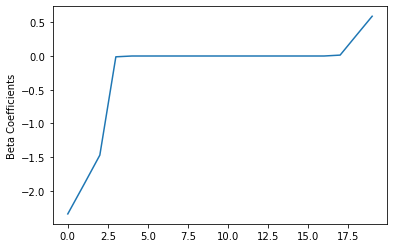

In [38]:
import matplotlib.pyplot as plt
import numpy as np
beta = np.sort(regressor.coefficients)
plt.plot(beta)
plt.ylabel('Beta Coefficients')
plt.show()

In [39]:
regressor.intercept

5.65323105207756

In [40]:
trainingSummary = regressor.summary
print("numIterations: %d" % trainingSummary.totalIterations)


numIterations: 101


In [46]:
test_data=featureassembler.transform(df_test)
rest=regressor.transform(test_data)
df=rest.toPandas()
rest.select("type","type_index","prediction").show(6)

+-----------------+----------+------------------+
|             type|type_index|        prediction|
+-----------------+----------+------------------+
|Feuille d'avokado|       4.0|3.5154331582726677|
|Feuille d'avokado|       4.0|2.9869750058883477|
|Feuille d'avokado|       4.0| 3.238131743651074|
|Feuille d'avokado|       4.0| 3.238131743651074|
|Feuille d'avokado|       4.0|3.4458106704157156|
|Feuille d'avokado|       4.0|  4.23211871431739|
+-----------------+----------+------------------+
only showing top 6 rows



In [42]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator=BinaryClassificationEvaluator(rawPredictionCol='prediction',labelCol='type_index')

In [44]:

print("The area under ROC for test set is {}".format(evaluator.evaluate(rest)))

The area under ROC for test set is 0.7105093488072212


In [47]:

#import data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)

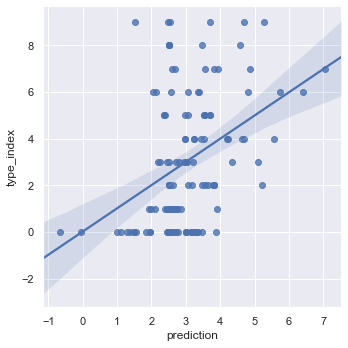

In [49]:
g = sns.lmplot(x="prediction", y="type_index",data=df)

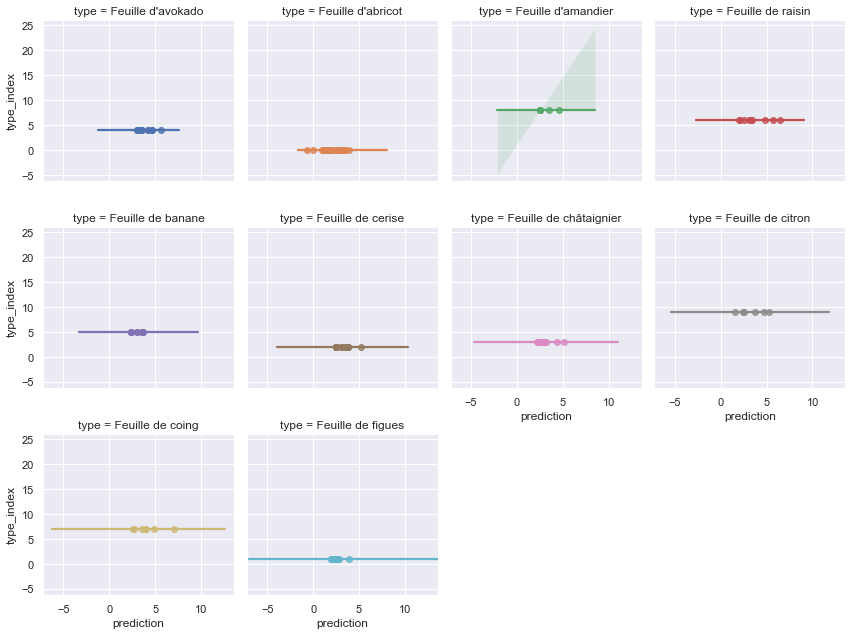

In [51]:
g = sns.lmplot(x="prediction", y="type_index",col="type", hue="type",col_wrap=4,height=3,data=df)